### Imports 

In [7]:
from halo import halo
from datetime import date
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
from time import sleep
import matplotlib.pyplot as plt

In [2]:
# creating the class that will hold all the data
halo_class = halo('LastPlayedData.csv')

In [16]:
# Figuring out how to use datetime for this function
datePlayed = halo_class.data[halo_class.gamertags()=='shabadabba']['LastPlayed']
tmp = datePlayed.keys()[0]
datePlayed = datePlayed[tmp]
parsedtime = parse(datePlayed)

In [9]:
# Found year
parsedtime.year

2021

### Pulling Out Last Played Month

Here we will be pulling out the last month each player played

In [3]:
# This is what will hold this data
output = {}
# Mostly so I can break out of it if I want to
try:
    #Going to loop through each player
    for itm in halo_class.gamertags():
        # Getting the string version of when that player last played
        datePlayed = halo_class.data[halo_class.gamertags()==itm]['LastPlayed']
        # Numpy handles it a bit wierd. This isolates the text
        tmp = datePlayed.keys()[0]
        datePlayed = datePlayed[tmp]
        
        # Some names failed to collect so I just don't want to pass np.nan into this
        # But it was like 100 that failed so most of them are here
        if isinstance(datePlayed,str):
            # Parse converts a string version to a datetime version
            parsedtime = parse(datePlayed)
            
            # basically if the year isn't in the output this will add it
            try:
                year = parsedtime.year
                output[year]
                # This will check if the month is in it and add 1 if it is.
                # If it isn't then this add it and sets its initial value to 1
                try:
                    month = parsedtime.month
                    output[year][month] += 1
                # Catches months that haven't been added
                except KeyError:
                    output[year][month] = 1
            except KeyError:
                output[year] = {}
except KeyboardInterrupt:
    1+1

In [4]:
# Here's the output of the above script
output

{2021: {12: 35738,
  8: 4523,
  11: 18809,
  9: 5322,
  10: 8305,
  7: 3055,
  1: 798,
  5: 1598,
  4: 1328,
  3: 1088,
  6: 2112,
  2: 926},
 2017: {10: 21,
  7: 20,
  3: 13,
  5: 23,
  4: 12,
  8: 43,
  11: 17,
  9: 24,
  2: 5,
  12: 10,
  6: 7},
 2020: {9: 461,
  12: 615,
  4: 344,
  8: 563,
  3: 243,
  7: 433,
  10: 476,
  11: 514,
  1: 152,
  6: 401,
  5: 324,
  2: 145},
 2018: {12: 39,
  10: 120,
  7: 36,
  9: 25,
  11: 63,
  8: 23,
  1: 11,
  5: 21,
  6: 32,
  4: 14,
  3: 14,
  2: 14},
 2019: {11: 104,
  8: 165,
  6: 70,
  12: 118,
  10: 113,
  9: 107,
  1: 47,
  7: 114,
  3: 55,
  5: 60,
  2: 47,
  4: 50}}

### Making the Graph

These are the cells that will calculate how many players are in each category. There is a better way to do this and that will be done later

In [ ]:
count2021 = 0
for key in output[2021]:
    if not(key==12 or key==11 or key==10):
        count2021+= output[2021][key]

In [16]:
count2020 = 0
for key in output[2020]:
    count2020+= output[2020][key]

In [19]:
count2019 = 0
for key in output[2019]:
    count2019+= output[2019][key]

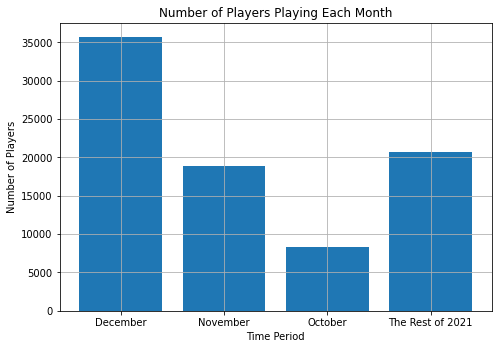

In [32]:
# Defining the plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Data
months = ['December', 'November','October' ,'The Rest of 2021']
data = [output[2021][12],output[2021][11],output[2021][10],count2021]
ax.bar(months,data)

# Set labels
ax.set_title("Number of Players Playing Each Month")
ax.set_xlabel('Time Period')
ax.set_ylabel('Number of Players')
ax.grid(True)

# Show the plot
plt.show()